AIRM Model - Monthly Beer Production in Australia

## Phrugsa Limboonlorm Section1 ID5988017

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Download Monthly Beer Production in Australia from CSV file

In [2]:
df = pd.read_csv("monthly-beer-production-in-austr.csv")


Change data type object in Month column to datetimeindex

## Exploring Data



There are two columns which are Month and Monthly beer production. Month will be used for time analysis to forcast sales of beer production in each month.

In [3]:
Beer= df.copy()
Beer.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
Beer['Month'] = pd.to_datetime(Beer['Month'])

Describe Data

In [5]:
Beer.describe()

,Monthly beer production
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


Date range

In [6]:
Beer['Month'].min(), Beer['Month'].max()

(Timestamp('1956-01-01 00:00:00'), Timestamp('1995-08-01 00:00:00'))

## Data Preprocessing



Check columns and data type

In [7]:
Beer.columns.values

array(['Month', 'Monthly beer production'], dtype=object)

Check Missing values in each column

In [8]:
cols = ['Month', 'Monthly beer production']
#furniture.drop(cols, axis=1, inplace=True)

Beer = Beer.sort_values('Month')

Beer.isnull().sum()

Month                      0
Monthly beer production    0
dtype: int64

In [9]:
Beer = Beer.groupby('Month')['Monthly beer production'].sum().reset_index()
Beer

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9
5,1956-06-01,64.8
6,1956-07-01,70.1
7,1956-08-01,77.3
8,1956-09-01,79.5
9,1956-10-01,100.6


## Indexing with Time Series Data

In [10]:
Beer= Beer.set_index('Month')
Beer.index

DatetimeIndex(['1956-01-01', '1956-02-01', '1956-03-01', '1956-04-01',
               '1956-05-01', '1956-06-01', '1956-07-01', '1956-08-01',
               '1956-09-01', '1956-10-01',
               ...
               '1994-11-01', '1994-12-01', '1995-01-01', '1995-02-01',
               '1995-03-01', '1995-04-01', '1995-05-01', '1995-06-01',
               '1995-07-01', '1995-08-01'],
              dtype='datetime64[ns]', name='Month', length=476, freq=None)

In [11]:
Beer.columns.values

array(['Monthly beer production'], dtype=object)

Use the averages monthly beer production and the start of each month as the timestamp.

In [29]:
y = Beer.resample('MS').mean()

In [31]:
y['1956']

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
1956-06-01,64.8
1956-07-01,70.1
1956-08-01,77.3
1956-09-01,79.5


## Visualizing Furniture Sales Time Series Data

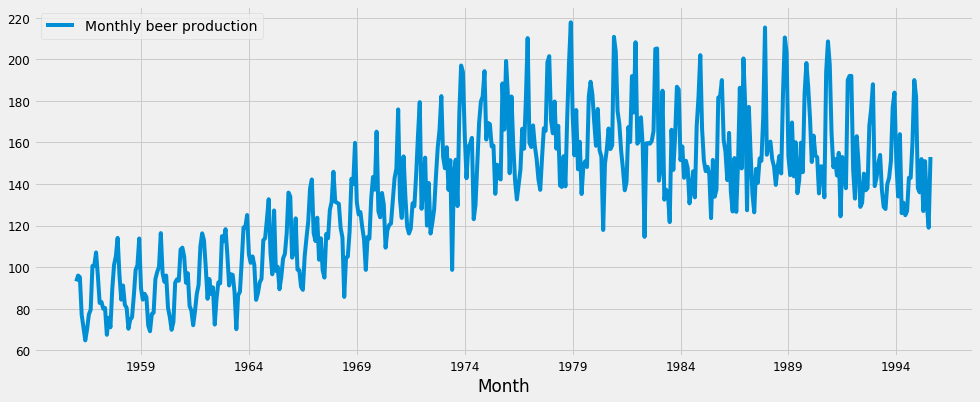

In [13]:
plt.style.use('fivethirtyeight')
y.plot(figsize=(15, 6))
plt.show()

Following the graph, the time-sereies has seasonality pattern in monthly beer production and the production is low at the beginning  has upward trend before slightly down. However, the graph is high at the latest year.


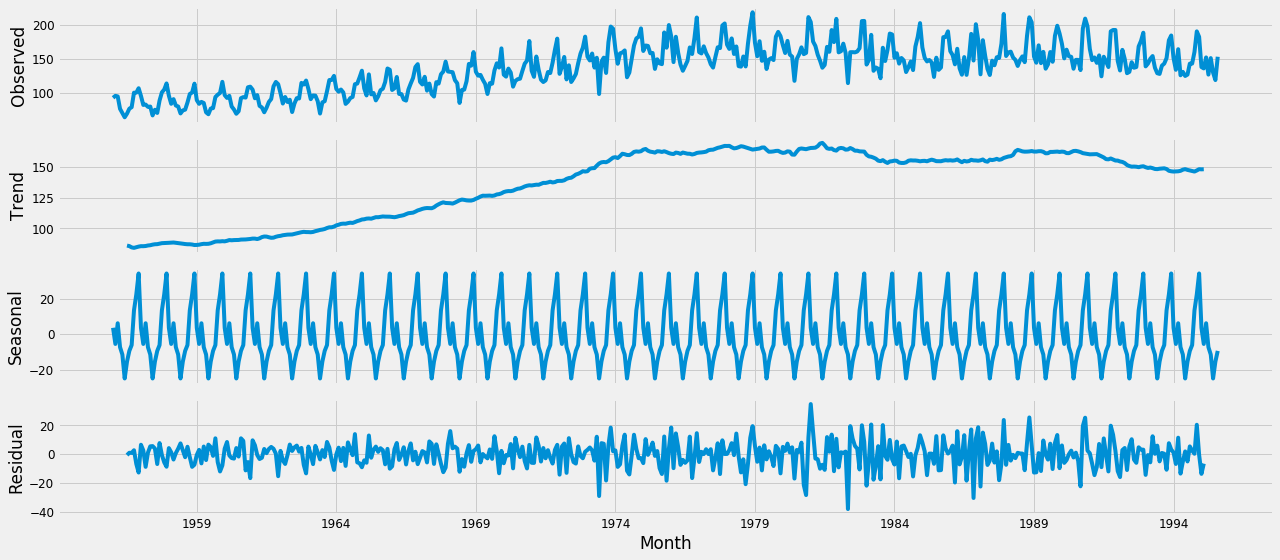

In [14]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')

fig = decomposition.plot()
plt.show()

The graph shows that the monthly beer production is inconsistent and there is seasonality.


## Time series forecasting with ARIMA


In [15]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


 ARIMA Time Series Model to user grid dearch forfinding the optimal sert in parmeters whose the performance for the model is best.

In [16]:
warnings.filterwarnings("ignore")

In [17]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6048.483263315012
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5353.324473760336
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3656.940289295837
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3533.4029545820667
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3663.927823726336
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3613.3364115908785
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3545.1636287409438
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3535.396011165206
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5461.584624684903
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4916.811619563378
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3648.080979151883
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3528.322956621162
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3662.026416960841
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3609.023438365879
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3547.06782581905
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3530.3129837883243
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4170.542605855216
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3966.060096945921
ARIMA(0

The above output suggests that SARIMAX(1, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 3372.01. Therefore,  this model is optimal.

## Fitting the ARIMA model

In [18]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1703      0.041     -4.143      0.000      -0.251      -0.090
ma.L1         -0.9320      0.016    -57.486      0.000      -0.964      -0.900
ar.S.L12      -0.3689      0.035    -10.663      0.000      -0.437      -0.301
sigma2       132.2494      6.763     19.555      0.000     118.994     145.505


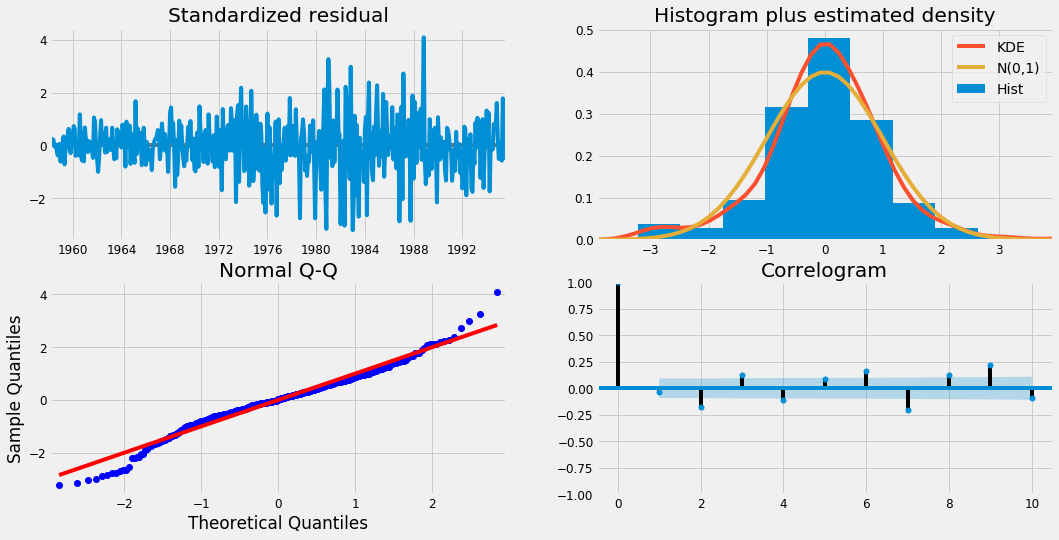

In [19]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Validating forecasts


In [20]:
Beer.index

DatetimeIndex(['1956-01-01', '1956-02-01', '1956-03-01', '1956-04-01',
               '1956-05-01', '1956-06-01', '1956-07-01', '1956-08-01',
               '1956-09-01', '1956-10-01',
               ...
               '1994-11-01', '1994-12-01', '1995-01-01', '1995-02-01',
               '1995-03-01', '1995-04-01', '1995-05-01', '1995-06-01',
               '1995-07-01', '1995-08-01'],
              dtype='datetime64[ns]', name='Month', length=476, freq=None)

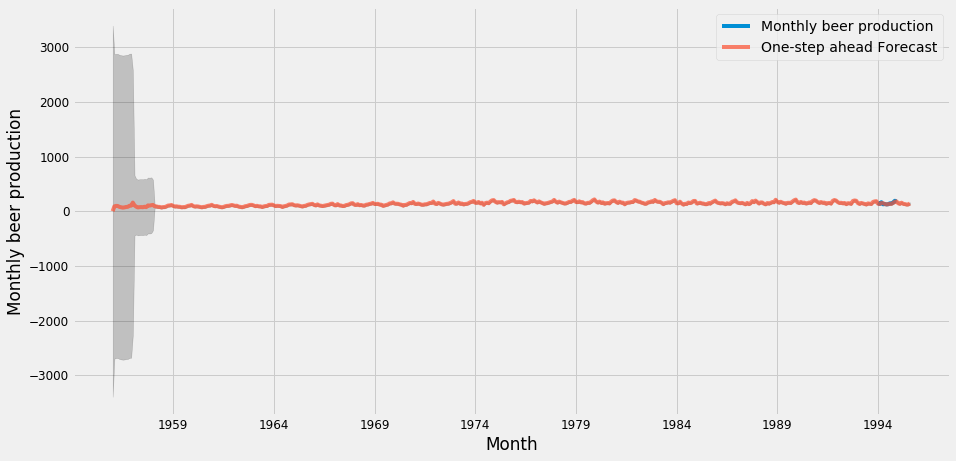

In [33]:
pred = results.get_prediction(start=pd.to_datetime('1956-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1994'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Month')
ax.set_ylabel('Monthly beer production')
plt.legend()
plt.show()

The graph show the relation between prediction and the real data in 1994. It is consistent.